In [2]:
import matplotlib.pyplot as plt 
import sys as sys 
sys.path.append('../src/')
from lbm_num import * 

In [3]:
#Physical parameters 
nu = 0.01
Pref = 101325
Tref = 300
Rgas = 287.15
#Latice 
D = 2 
Q = 9 
#Time step 
Dt = 0.00001
#Create Fluid domain and Grid 
Dx = 0.001
Lx = 0.12
Ly = 0.1
Nx = np.int((Lx/Dx) + 1)
Ny = np.int((Ly/Dx) + 1)
x = np.linspace(-Lx/2,Lx/2,Nx)
y = np.linspace(-Ly/2,Ly/2,Ny)
xv, yv = np.meshgrid(x, y,indexing = 'ij') 
label = np.zeros((Nx,Ny))
#Initial condition 
ux = np.zeros((Nx,Ny))
uy = np.zeros((Nx,Ny))
rho = np.zeros((Nx,Ny))
P = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        R = 0.004/Dx
        xCentered =  i-(Nx-1.)/2.#xv[i,j] 
        yCentered =  j-(Ny-1.)/2.#yv[i,j]
        P[i,j] = Pref+ 0.1 * Pref * np.exp(-(xCentered*xCentered+yCentered*yCentered)/(4*R*R))
rho = P/(Rgas*Tref) 

No boudary condition provided


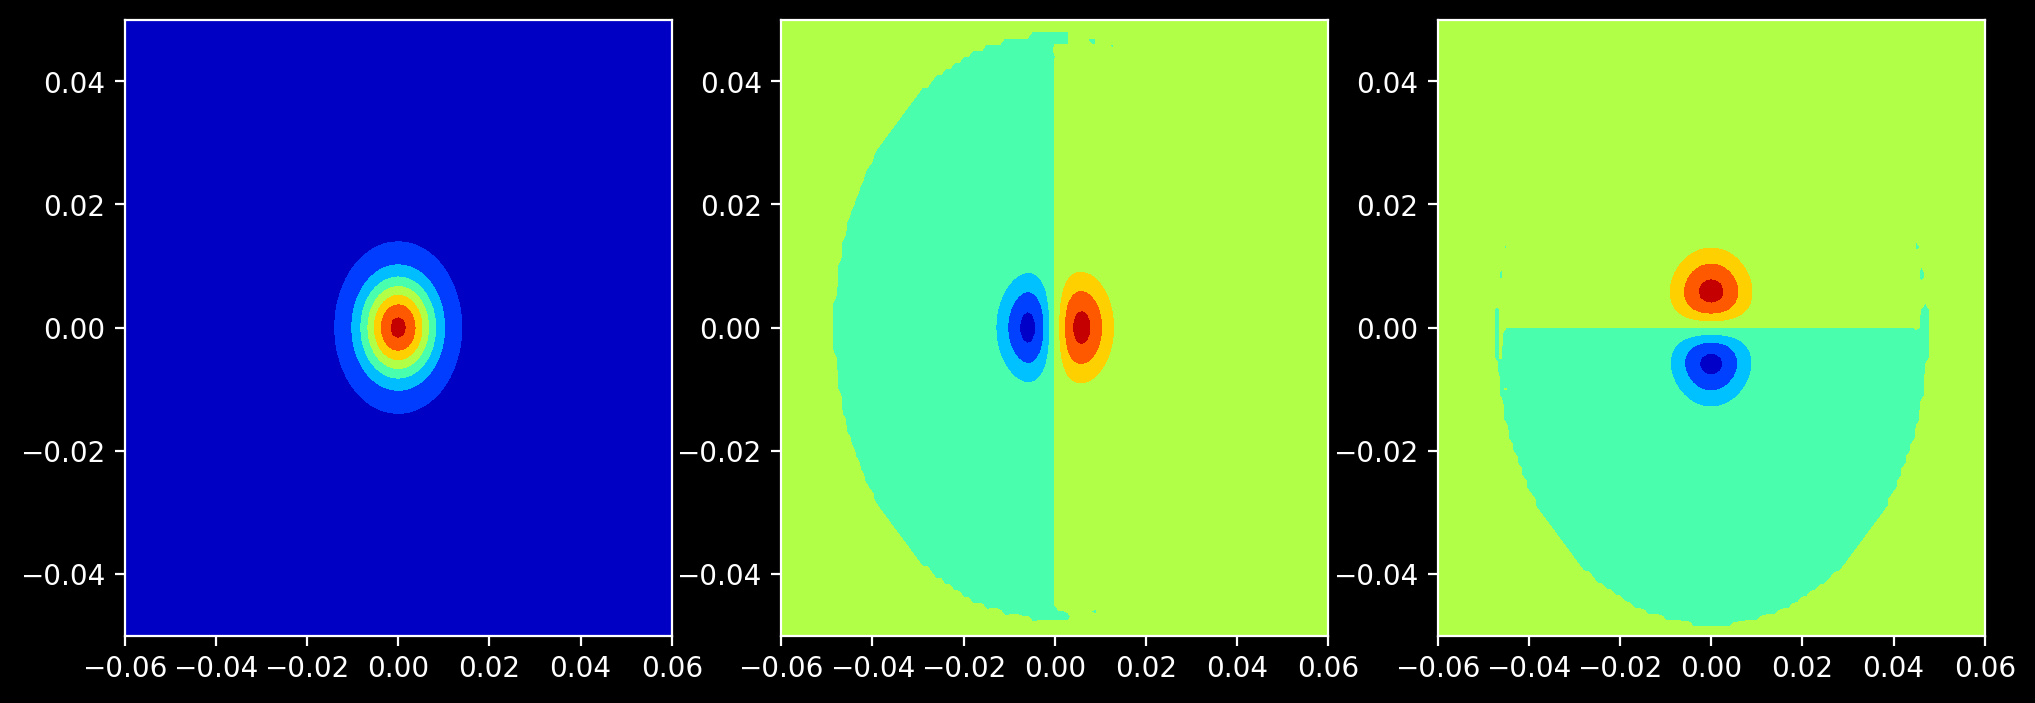

No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided


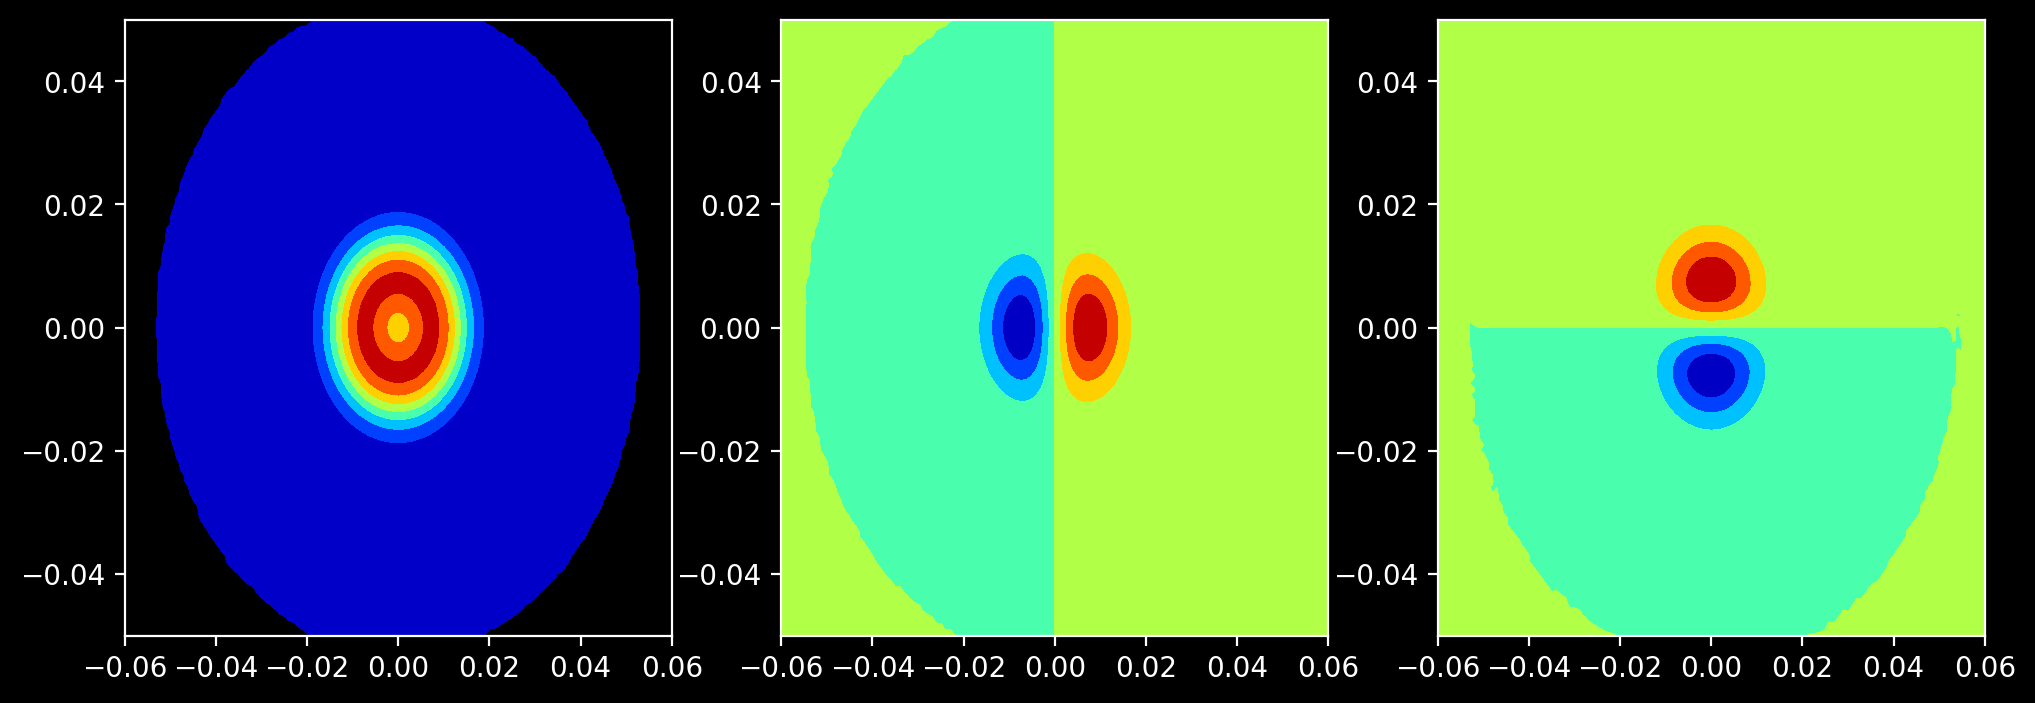

No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided
No boudary condition provided


KeyboardInterrupt: 

In [4]:
ex, ey, w, cs = GetLatice(D=D,Q=Q)
# Calc tau
Nulb = (nu*Dt)/(Dx * Dx)
thau = (Nulb/(cs*cs)) + 0.5
# Scale Macro var 
rho = rho *((Rgas*Tref)/Pref)

#
levels1 = np.linspace(0.99, 1.11, 20)
levels2 = np.linspace(0.99, 1.11, 20)
levels3 = np.linspace(0.99, 1.11, 20)
#Temporal loop
f = CalcFeq(rho,ux,uy,ex,ey,w,cs,Nx,Ny,Q,thau)
for i in range(101):
    feq = CalcFeq(rho,ux,uy,ex,ey,w,cs,Nx,Ny,Q,thau)
    fstar = Collision(f,feq,thau,Nx,Ny,Q)
    fstream = Streaming(fstar,Nx,Ny,Q)
    ux,uy,rho = CalcMacro(fstream,ex,ey,Nx,Ny,Q)
    f = fstream
    # Post Treatement 
    if i%10 == 0:
        fig = plt.figure(figsize = (12,4))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        z1_plot=ax1.contourf(xv, yv, rho,cmap = 'jet')
        ax2.contourf(xv, yv, ux,cmap = 'jet')
        ax3.contourf(xv, yv, uy,cmap = 'jet')
        #fig.colorbar(z1_plot,cax=ax1)
        plt.show()
        plt.close()
        